# Importing Required Libraries


In [1]:
import pandas as pd

import numpy as np

import pickle

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import sklearn

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV

import imblearn

from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import scale

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

import warnings

warnings.filterwarnings('ignore')

# Reading the Dataset

In [2]:
df = pd.read_csv('autos.csv', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'], encoding = 'latin1')

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          371528 non-null  datetime64[ns]
 1   name                 371528 non-null  object        
 2   seller               371528 non-null  object        
 3   offerType            371528 non-null  object        
 4   price                371528 non-null  int64         
 5   abtest               371528 non-null  object        
 6   vehicleType          333659 non-null  object        
 7   yearOfRegistration   371528 non-null  int64         
 8   gearbox              351319 non-null  object        
 9   powerPS              371528 non-null  int64         
 10  model                351044 non-null  object        
 11  kilometer            371528 non-null  int64         
 12  monthOfRegistration  371528 non-null  int64         
 13  fuelType      

In [5]:
df.shape

(371528, 20)

# Cleaning the Dataset

In [6]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [7]:
# Rearranging the Columns
df = df[['dateCrawled', 'name', 'seller', 'offerType', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen', 'price']]

In [8]:
# Droping the Unwanted Columns
df.drop(columns= ['seller', 'offerType', 'nrOfPictures'], inplace = True)

In [9]:
df.drop(columns= ['name','dateCrawled', 'dateCreated', 'lastSeen'], inplace = True)

# Missing Values

In [10]:
# Checking for Missing Values
df.isna().sum()

abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
postalCode                 0
price                      0
dtype: int64

In [11]:
# Removing Missing Values
df['vehicleType'].fillna(df['vehicleType'].mode()[0], inplace = True)
df['gearbox'].fillna(df['gearbox'].mode()[0], inplace = True)
df['model'].fillna(df['model'].mode()[0], inplace = True)
df['fuelType'].fillna(df['fuelType'].mode()[0], inplace = True)
df['notRepairedDamage'].fillna(df['notRepairedDamage'].mode()[0], inplace = True)

In [12]:
df.isna().sum()

abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
price                  0
dtype: int64

# Duplicate Values

In [13]:
# Checking for Duplicates
df.duplicated().sum()

16293

In [14]:
# Removing Duplicates
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

# Label Encoding

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355235 entries, 0 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   abtest               355235 non-null  object
 1   vehicleType          355235 non-null  object
 2   yearOfRegistration   355235 non-null  int64 
 3   gearbox              355235 non-null  object
 4   powerPS              355235 non-null  int64 
 5   model                355235 non-null  object
 6   kilometer            355235 non-null  int64 
 7   monthOfRegistration  355235 non-null  int64 
 8   fuelType             355235 non-null  object
 9   brand                355235 non-null  object
 10  notRepairedDamage    355235 non-null  object
 11  postalCode           355235 non-null  int64 
 12  price                355235 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 37.9+ MB


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['abtest'] = le.fit_transform(df['abtest'])
df['vehicleType'] = le.fit_transform(df['vehicleType'])
df['gearbox'] = le.fit_transform(df['gearbox'])
df['model'] = le.fit_transform(df['model'])
df['fuelType'] = le.fit_transform(df['fuelType'])
df['brand'] = le.fit_transform(df['brand'])
df['notRepairedDamage'] = df['notRepairedDamage'].replace({'nein' : 0, 'ja' : 1})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355235 entries, 0 to 371527
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   abtest               355235 non-null  int32
 1   vehicleType          355235 non-null  int32
 2   yearOfRegistration   355235 non-null  int64
 3   gearbox              355235 non-null  int32
 4   powerPS              355235 non-null  int64
 5   model                355235 non-null  int32
 6   kilometer            355235 non-null  int64
 7   monthOfRegistration  355235 non-null  int64
 8   fuelType             355235 non-null  int32
 9   brand                355235 non-null  int32
 10  notRepairedDamage    355235 non-null  int64
 11  postalCode           355235 non-null  int64
 12  price                355235 non-null  int64
dtypes: int32(6), int64(7)
memory usage: 29.8 MB


# Identifying and Handling Outliers

In [19]:
df.skew()

abtest                  -0.071283
vehicleType             -0.878295
yearOfRegistration      71.792452
gearbox                 -1.448072
powerPS                 57.382782
model                    0.407406
kilometer               -1.558004
monthOfRegistration      0.082817
fuelType                 1.486970
brand                   -0.150972
notRepairedDamage        2.675437
postalCode               0.057159
price                  565.242094
dtype: float64

In [20]:
df.yearOfRegistration=df.yearOfRegistration.clip(lower=df.yearOfRegistration.quantile(0.05),upper=df.yearOfRegistration.quantile(0.95))

df.price=df.price.clip(lower=df.price.quantile(0.05),upper=df.price.quantile(0.95))

df.powerPS=df.powerPS.clip(lower=df.powerPS.quantile(0.05),upper=df.powerPS.quantile(0.95))

In [21]:
df.skew()

abtest                -0.071283
vehicleType           -0.878295
yearOfRegistration     0.160228
gearbox               -1.448072
powerPS                0.076974
model                  0.407406
kilometer             -1.558004
monthOfRegistration    0.082817
fuelType               1.486970
brand                 -0.150972
notRepairedDamage      2.675437
postalCode             0.057159
price                  1.422778
dtype: float64

# Visualization

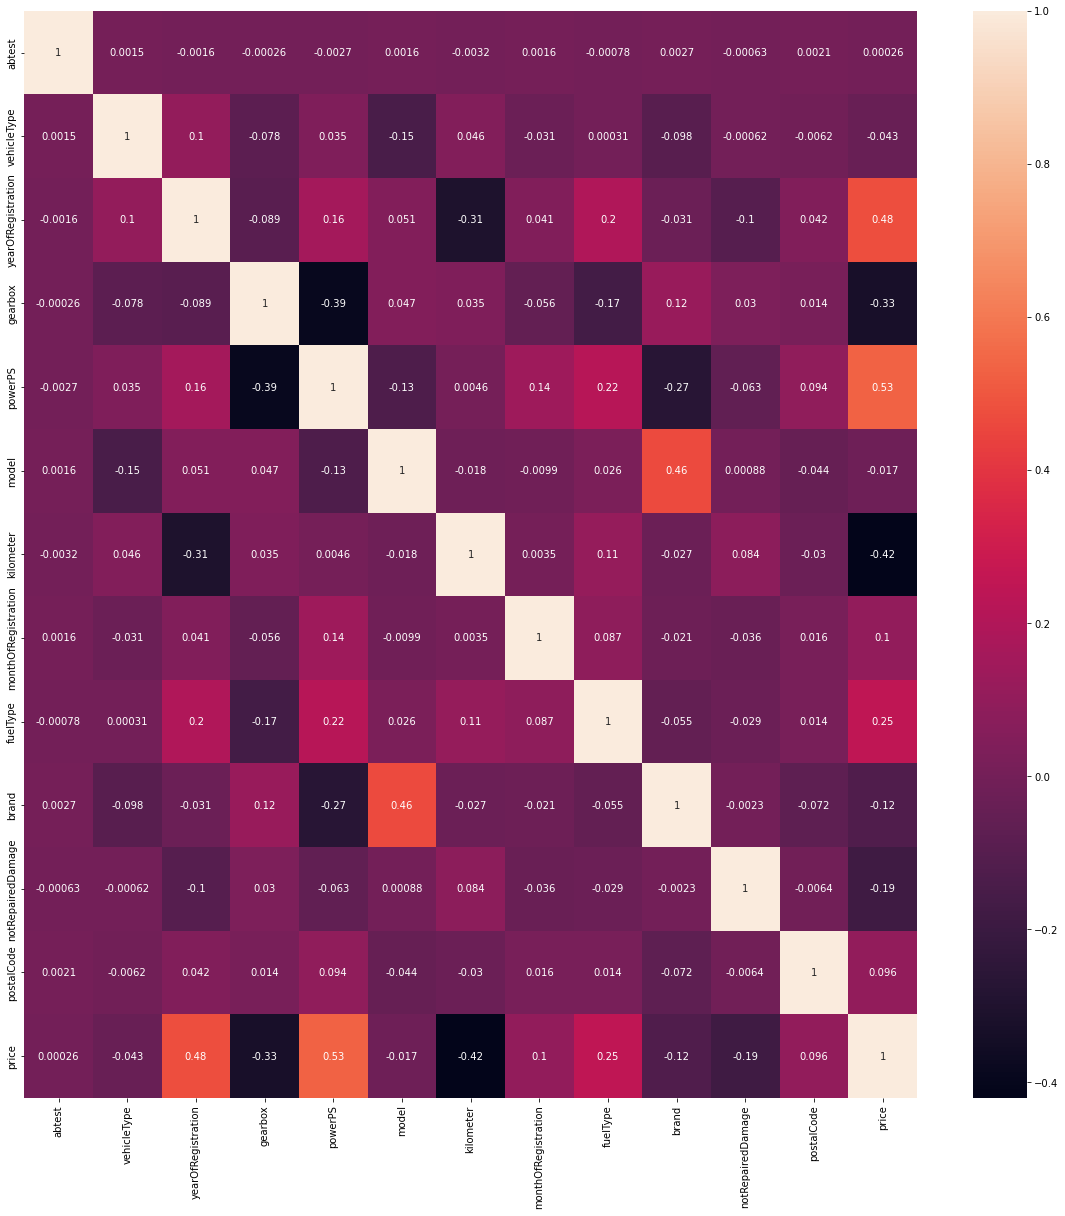

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

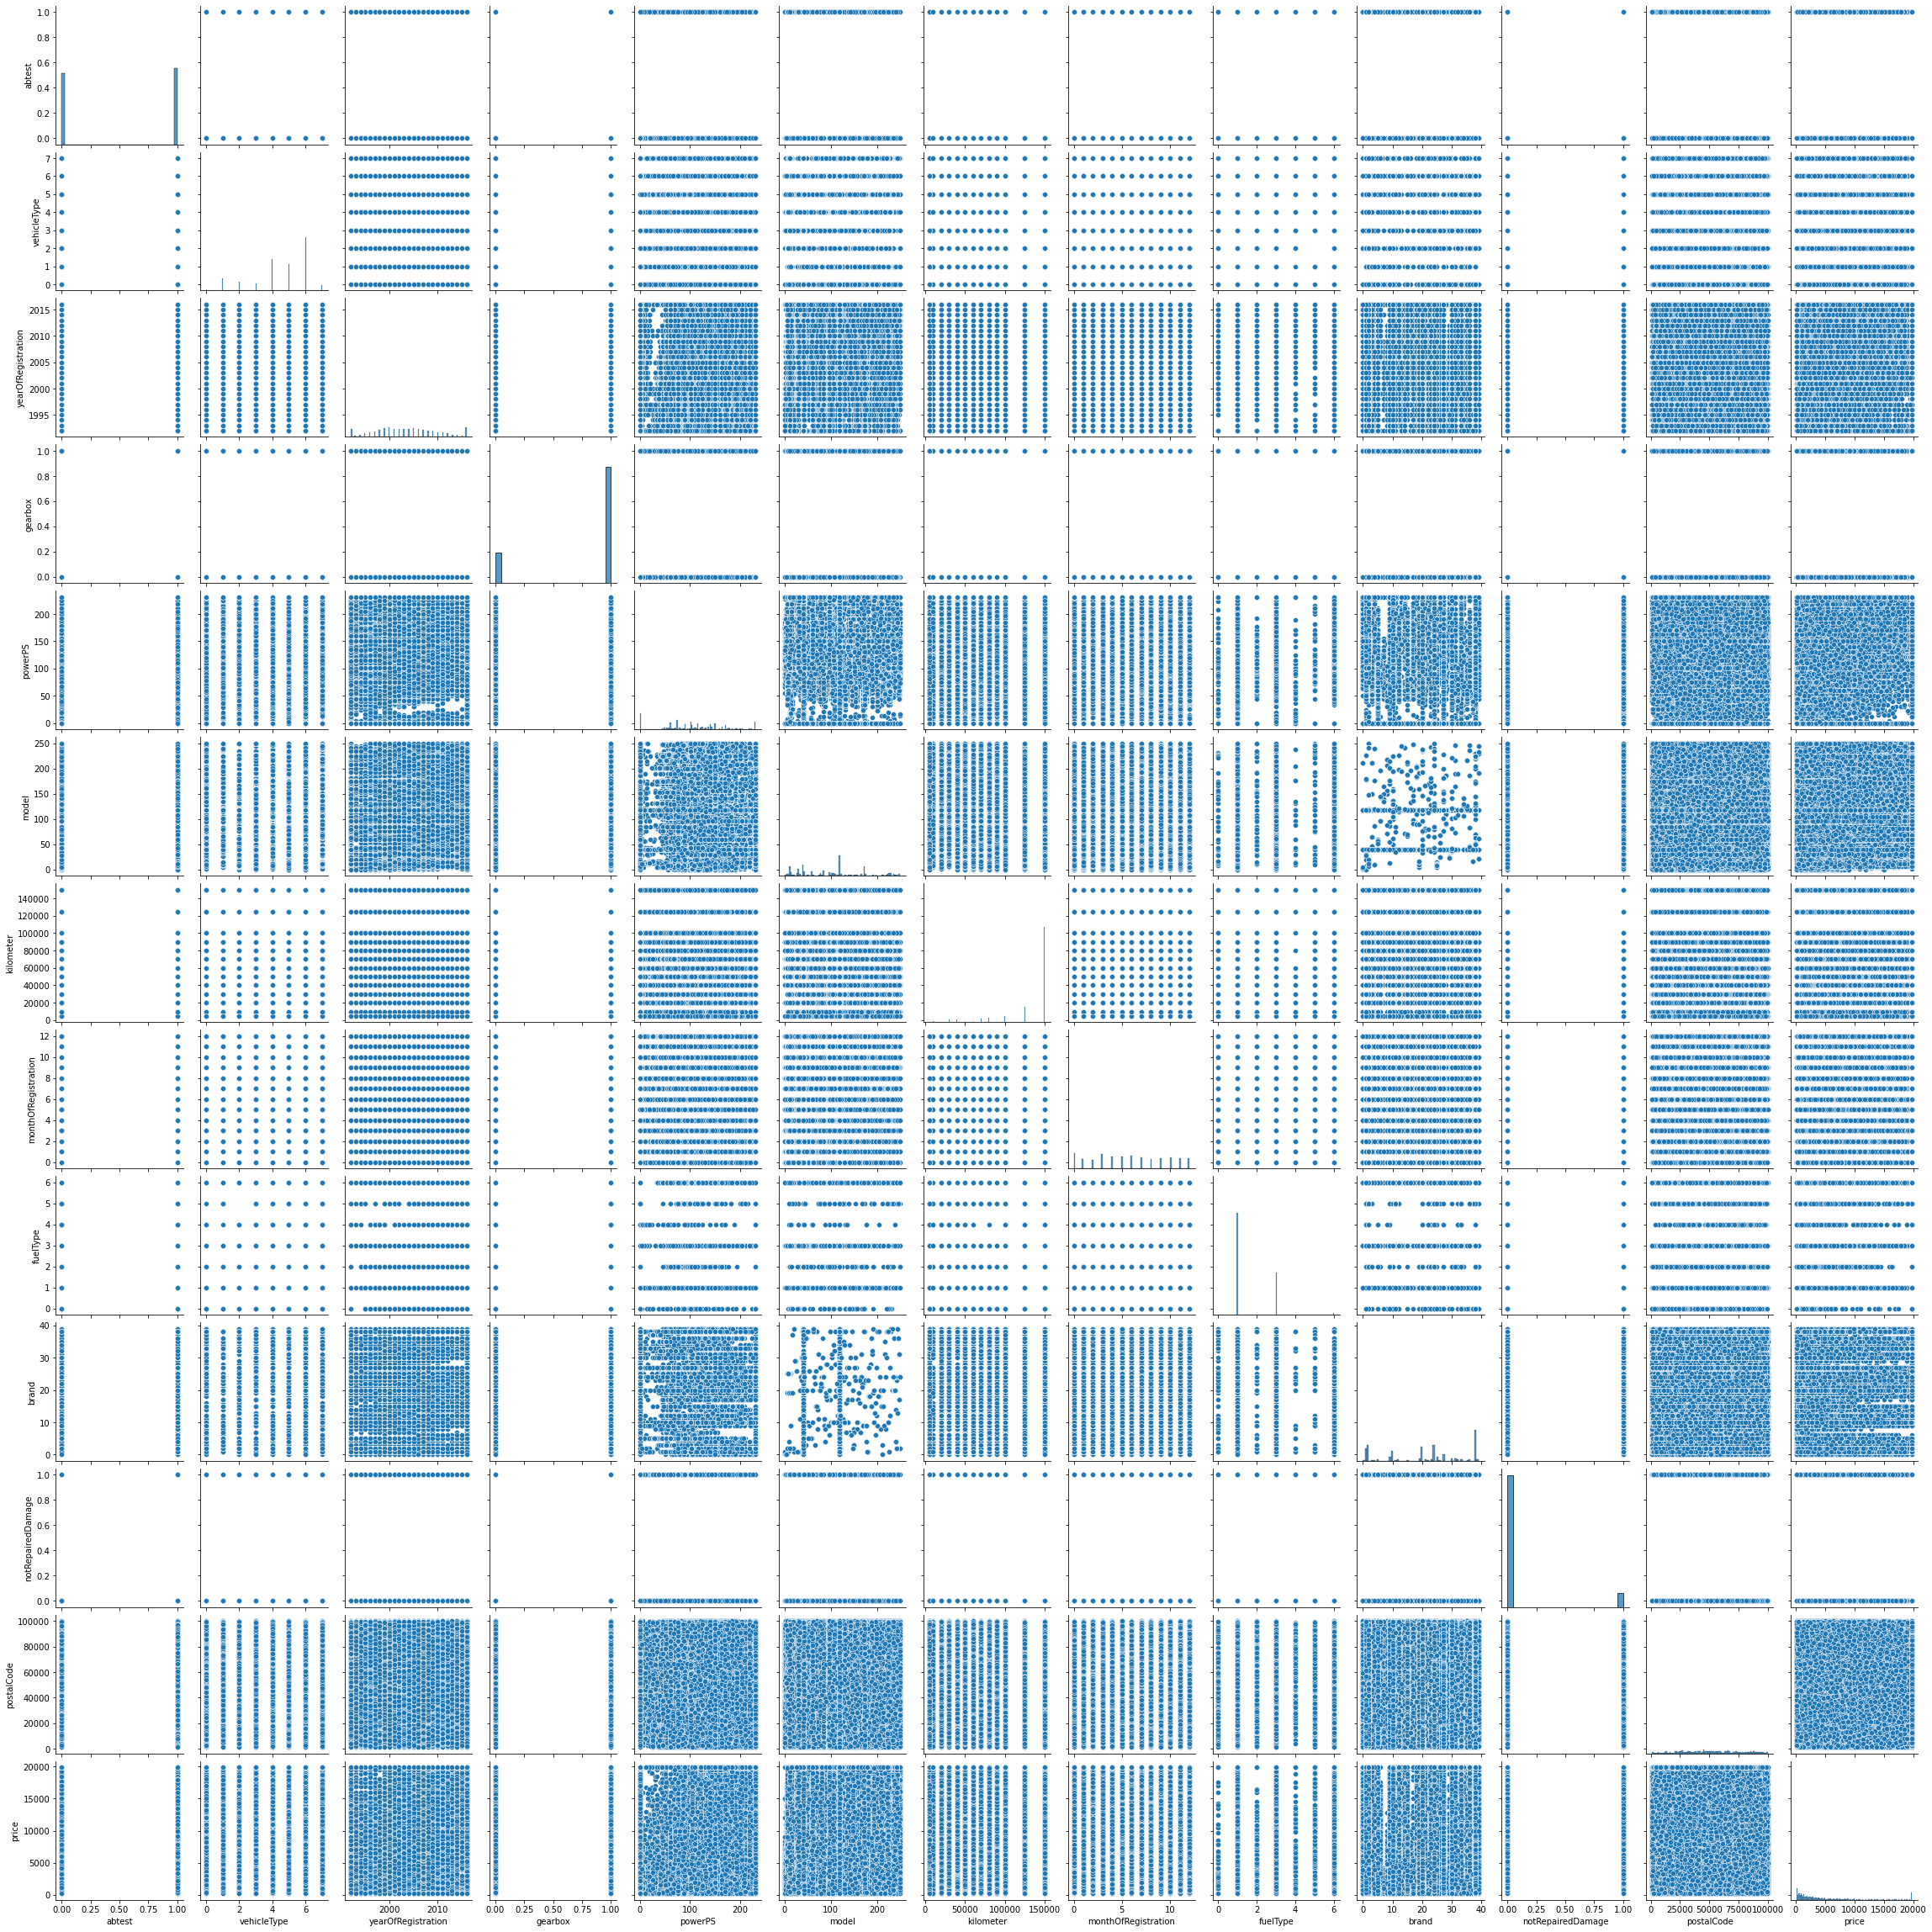

In [23]:
sns.pairplot(df)
plt.show()

# Descriptive Statistics

In [24]:
df.nunique()

abtest                    2
vehicleType               8
yearOfRegistration       25
gearbox                   2
powerPS                 232
model                   251
kilometer                13
monthOfRegistration      13
fuelType                  7
brand                    40
notRepairedDamage         2
postalCode             8150
price                  3590
dtype: int64

In [25]:
df.describe()

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,price
count,355235.000000,355235.000000,355235.000000,355235.000000,355235.000000,355235.000000,355235.000000,355235.000000,355235.000000,355235.000000,355235.000000,355235.000000,355235.000000
mean,0.517809,4.565654,2003.684913,0.793227,108.575813,101.813974,125667.839599,5.717725,1.653964,20.685833,0.099528,50967.850550,5118.183647
std,0.499683,1.684310,6.410200,0.404992,61.360432,69.747773,40132.229762,3.714120,1.050821,13.354508,0.299371,25799.282212,5468.765541
min,0.000000,0.000000,1992.000000,0.000000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,0.000000,1067.000000,200.000000
25%,0.000000,4.000000,1999.000000,1.000000,69.000000,40.000000,125000.000000,3.000000,1.000000,9.000000,0.000000,30655.000000,1100.000000
50%,1.000000,5.000000,2003.000000,1.000000,105.000000,104.000000,150000.000000,6.000000,1.000000,23.000000,0.000000,49688.000000,2911.000000
75%,1.000000,6.000000,2008.000000,1.000000,150.000000,153.000000,150000.000000,9.000000,3.000000,33.000000,0.000000,71691.000000,7100.000000
max,1.000000,7.000000,2016.000000,1.000000,231.000000,250.000000,150000.000000,12.000000,6.000000,39.000000,1.000000,99998.000000,19850.000000


In [26]:
df.skew()

abtest                -0.071283
vehicleType           -0.878295
yearOfRegistration     0.160228
gearbox               -1.448072
powerPS                0.076974
model                  0.407406
kilometer             -1.558004
monthOfRegistration    0.082817
fuelType               1.486970
brand                 -0.150972
notRepairedDamage      2.675437
postalCode             0.057159
price                  1.422778
dtype: float64

In [27]:
df.kurt()

abtest                -1.994930
vehicleType           -0.132162
yearOfRegistration    -0.678041
gearbox                0.096913
powerPS               -0.421559
model                 -0.895174
kilometer              1.244016
monthOfRegistration   -1.141852
fuelType               2.198215
brand                 -1.325496
notRepairedDamage      5.157994
postalCode            -0.978047
price                  1.062858
dtype: float64

# Splitting the Data

In [28]:
# Splitting x and y variables
x = df.drop(columns = 'price')
y = df['price']

In [29]:
# Splitting into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Building Models

## Linear Regression 

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

## Lasso Regression

In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, normalize=True)
lasso.fit(x_train, y_train)

Lasso(alpha=0.01, normalize=True)

## Decision Tree 

In [32]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

## KNN 

In [33]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

# Checking the Metrics of the models

In [35]:
# Linear Regression
lr.score(x_test, y_test)

0.5843754326648342

In [36]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))

3534.6932574687225

In [37]:
# Lasso Regression
lasso.score(x_test, y_test)

0.5843344404460793

In [38]:
np.sqrt(mean_squared_error(y_test,lasso.predict(x_test)))

3534.8675630297157

In [39]:
# K Nearest Neighbour
knn.score(x_test, y_test)

0.5092540002760966

In [40]:
np.sqrt(mean_squared_error(y_test,knn.predict(x_test)))

3840.869135158522

In [41]:
# Decision Tree
DT.score(x_test, y_test)

0.7569989012440219

In [42]:
np.sqrt(mean_squared_error(y_test,DT.predict(x_test)))

2702.7460720252025

In [43]:
# Random Forest
RF.score(x_test, y_test)

0.8711080649361154

In [44]:
np.sqrt(mean_squared_error(y_test,RF.predict(x_test)))

1968.4029086585144